In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
def plot_ar1_acf(phi_0, phi_1):
    acf = np.array([phi_1** i for i in range(30)])
    fig = plt.figure(figsize = (8,4.5))
    plt.bar(x = range(len(acf)),height = acf)
    plt.xlabel('Лаг (h)')
    plt.ylabel('Автокорреляция')
    plt.title(r'Коррелограмма АКФ для процесса $Y_t= %.2f +  %.2f Y_{t-1} + \varepsilon_t$' %(phi_0, phi_1))
    plt.show()

In [10]:
def plot_ar1_pacf(phi_0, phi_1):
    pacf = np.array([1, phi_1] + [0]*28)
    fig = plt.figure(figsize = (8,4.5))
    plt.bar(x = range(len(pacf)),height = pacf)
    plt.xlabel('Лаг (h)')
    plt.ylabel('Частичная автокорреляция')
    plt.title(r'Коррелограмма ЧАКФ для процесса $Y_t= %.2f +  %.2f Y_{t-1} + \varepsilon_t$' %(phi_0, phi_1))
    plt.show()

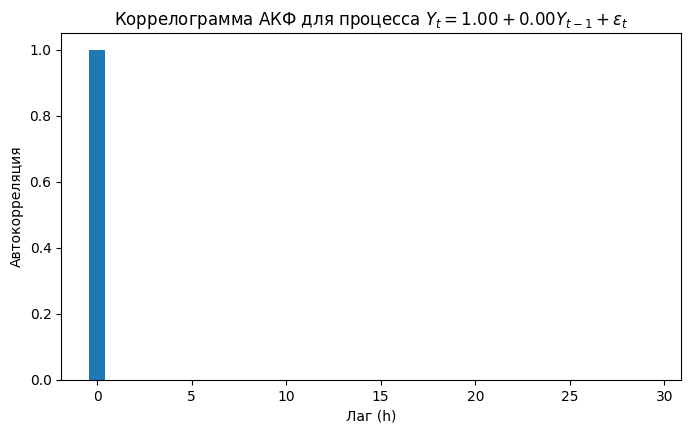

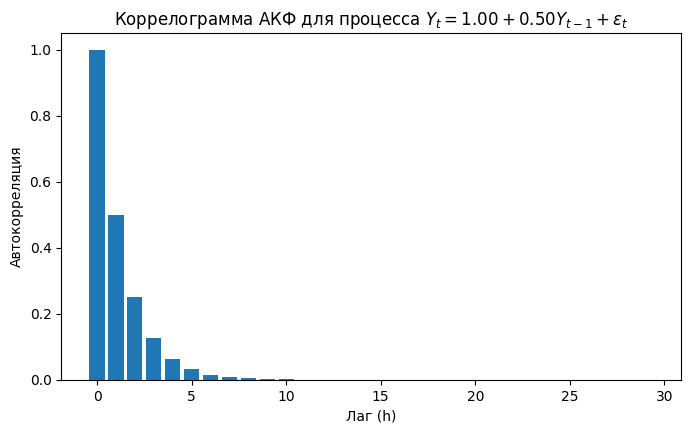

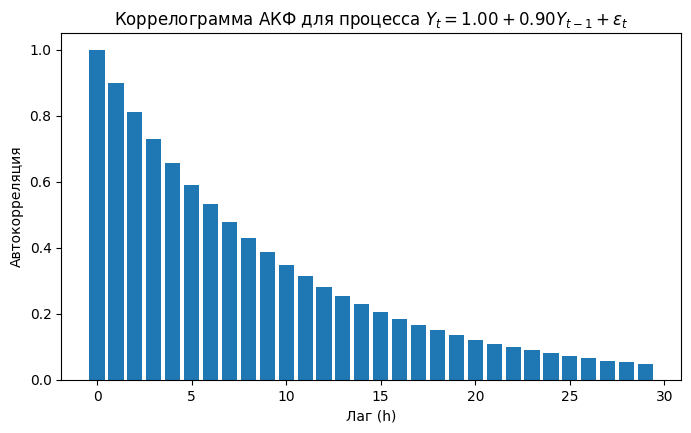

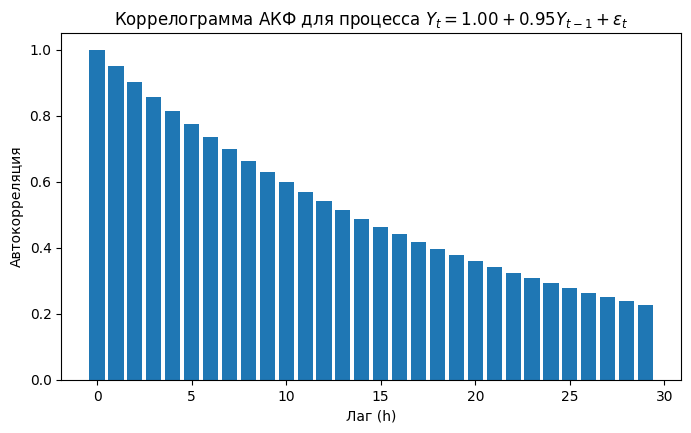

In [7]:
for phi_1 in [0, 0.5, 0.9, 0.95]:
    plot_ar1_acf(phi_0 = 1, phi_1 = phi_1)

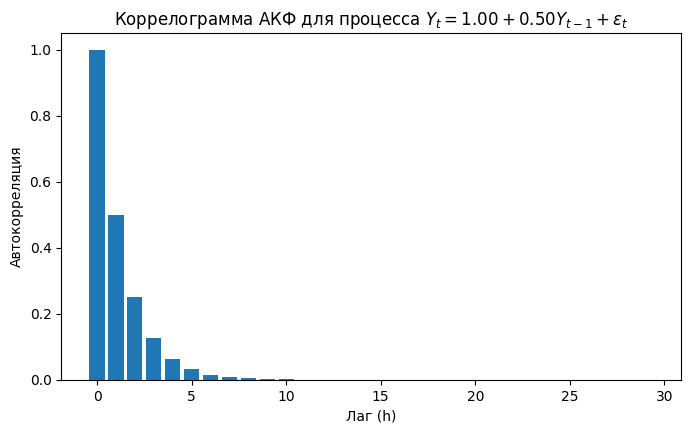

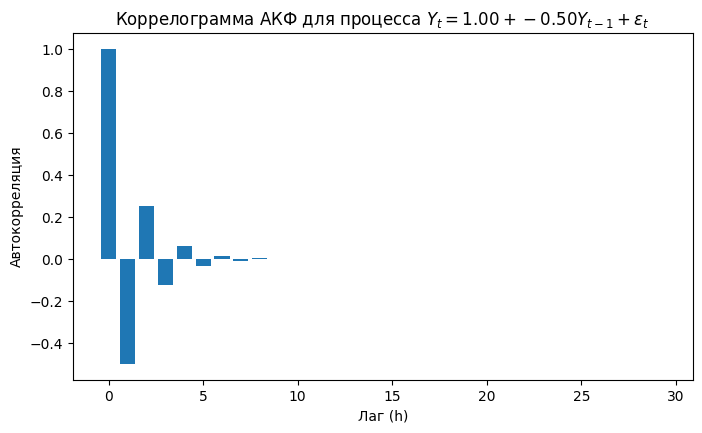

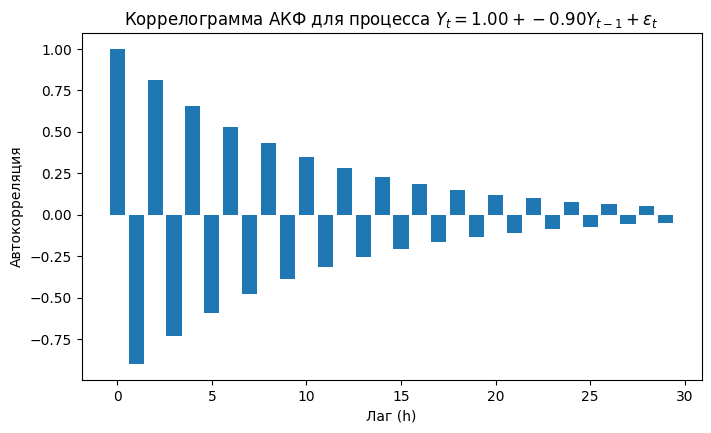

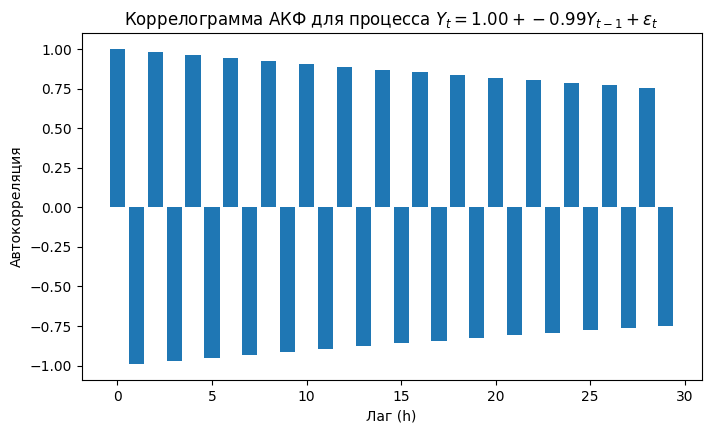

In [8]:
for phi_1 in [0.5, -0.5, -0.9, -0.99]:
    plot_ar1_acf(phi_0 = 1, phi_1 = phi_1)

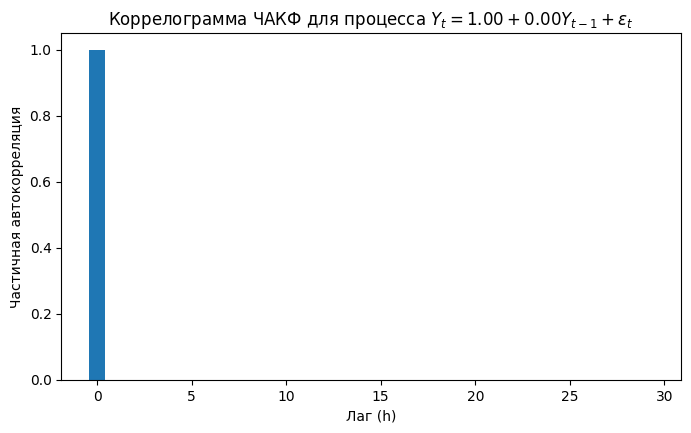

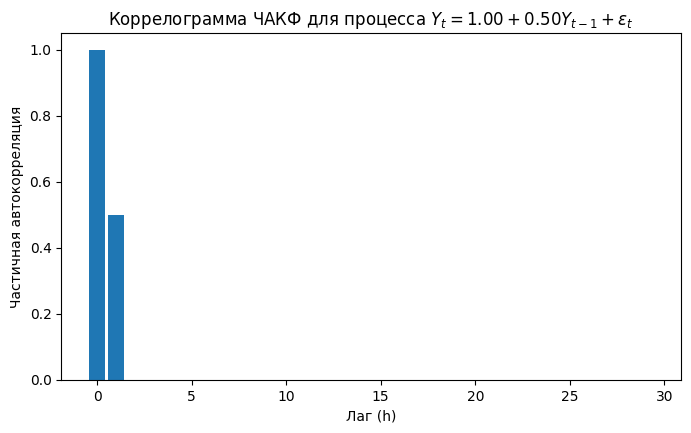

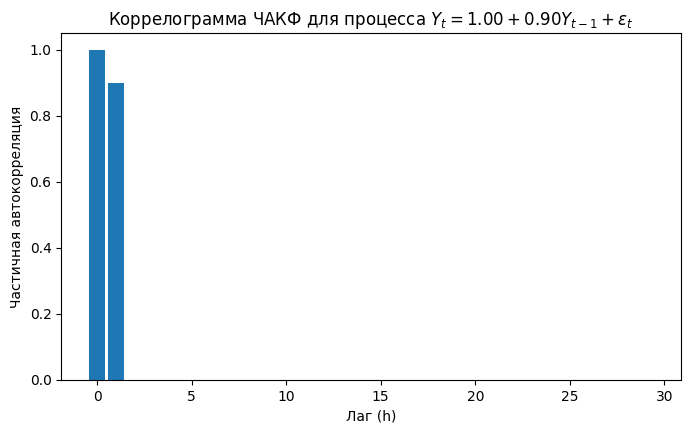

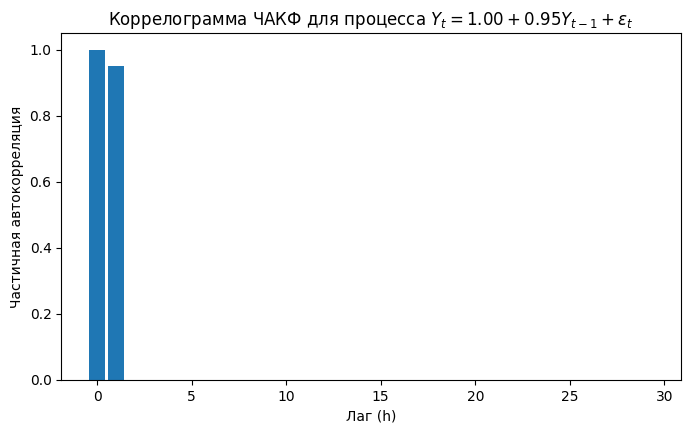

In [11]:
for phi_1 in [0, 0.5, 0.9, 0.95]:
    plot_ar1_pacf(phi_0 = 1, phi_1 = phi_1)

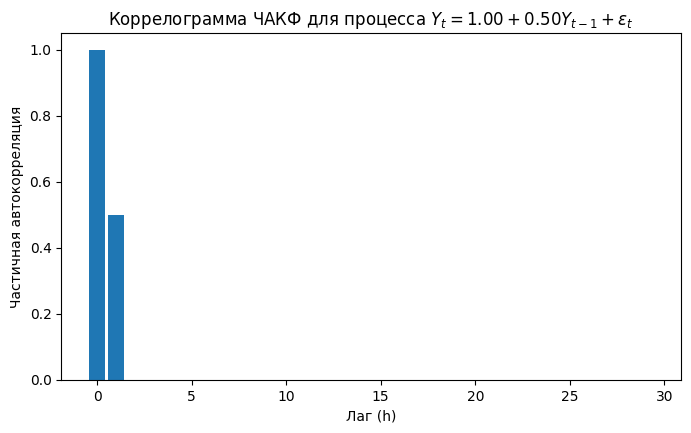

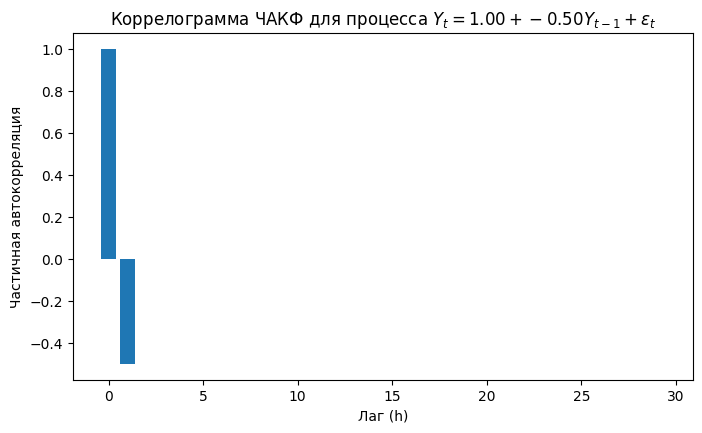

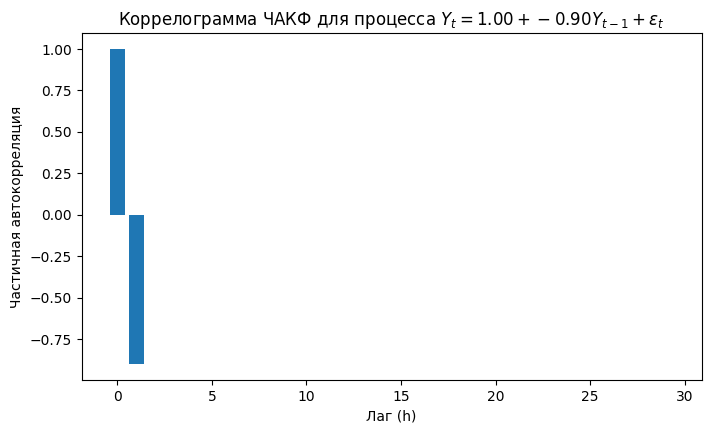

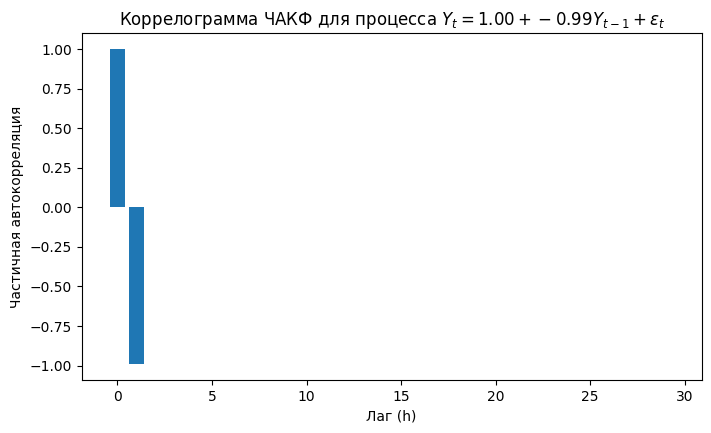

In [12]:
for phi_1 in [0.5, -0.5, -0.9, -0.99]:
    plot_ar1_pacf(phi_0 = 1, phi_1 = phi_1)

In [30]:
def simulate_ar1_with_shock(phi_0, phi_1, T, random_state, plot = True):
    y = np.zeros(T)
    if phi_1 == 1:
        y[0] = stats.norm.rvs(1)
    else:
        y[0] = phi_0 / (1-phi_1)
    epsilons = stats.norm.rvs(size = T, random_state = random_state)
    epsilons[int(T/2)] = 10
    for t in range(1, T):
        y[t] = phi_0 + phi_1*y[t-1] + epsilons[t]
    if plot:
        fig = plt.figure(figsize = (8,4.5))
        plt.plot(y)
        plt.xlabel('Период')
        plt.ylabel('Значение')
        plt.title(r'Cимуляция процесса $Y_t = %.2f + %.2f Y_{t-1} + \varepsilon_t$' %(phi_0, phi_1))
        plt.hlines(y = y[0], xmin =0, xmax = T, color = 'r', linestyles = '--')
        plt.text(x = T*0.95, y = y[0]*1.1, s = r'$\frac{%.2f}{1-%.2f}$' %(phi_0, phi_1), color = 'r')
        plt.show()
    else:
        return y

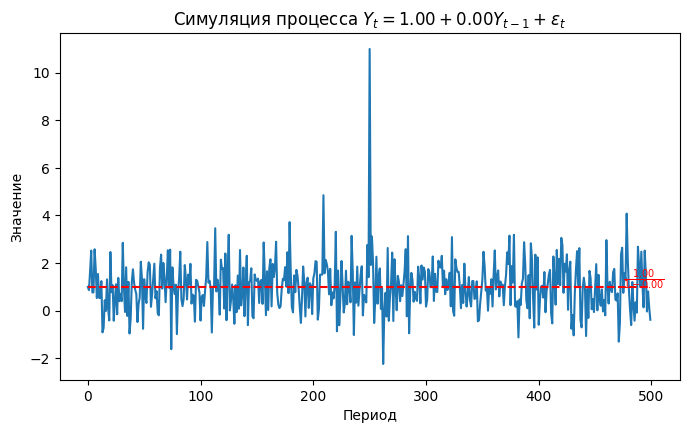

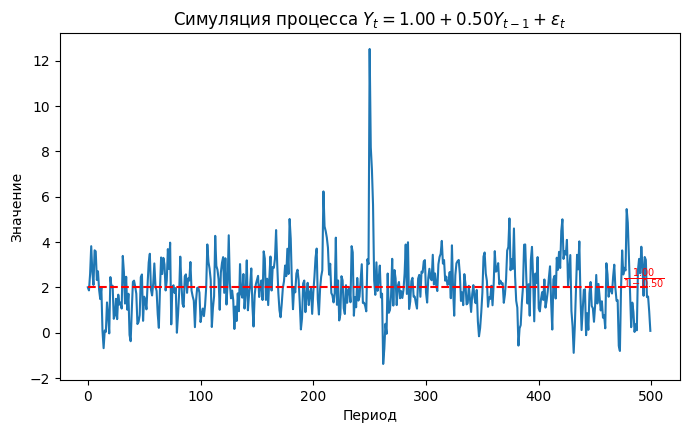

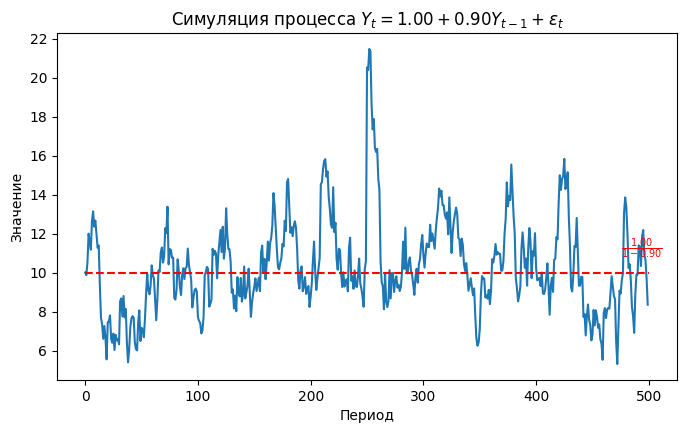

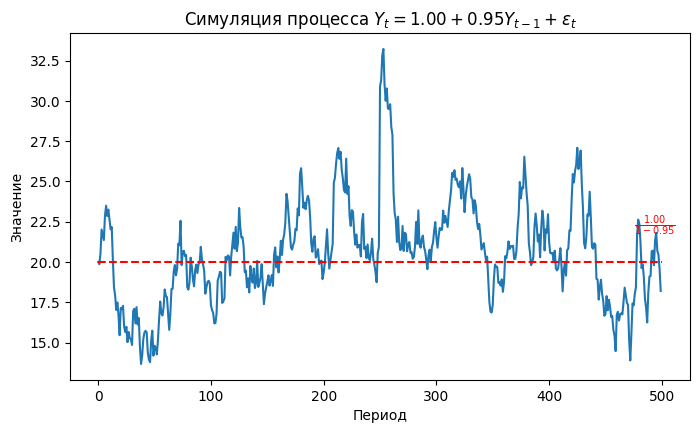

In [31]:
for phi_1 in [0, 0.5, 0.9, 0.95]:
    simulate_ar1_with_shock(phi_0 = 1, phi_1 = phi_1, T = 500, random_state = 42, plot = True)

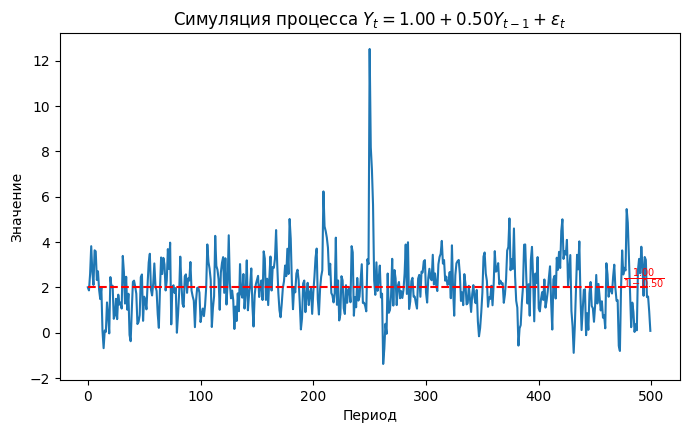

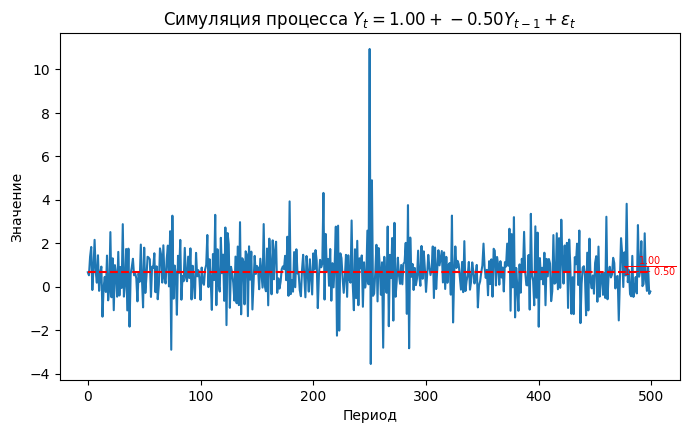

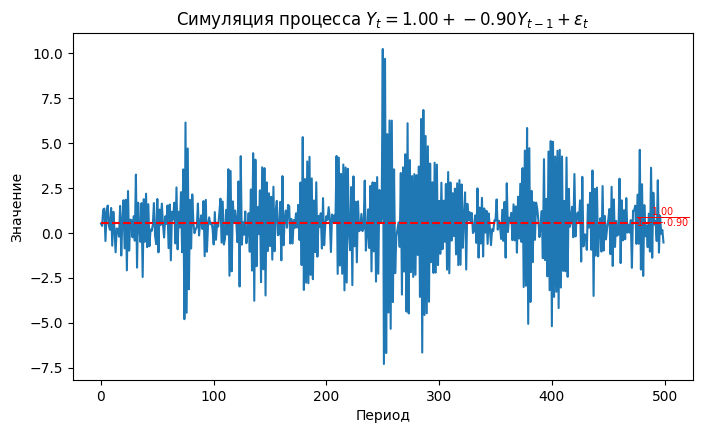

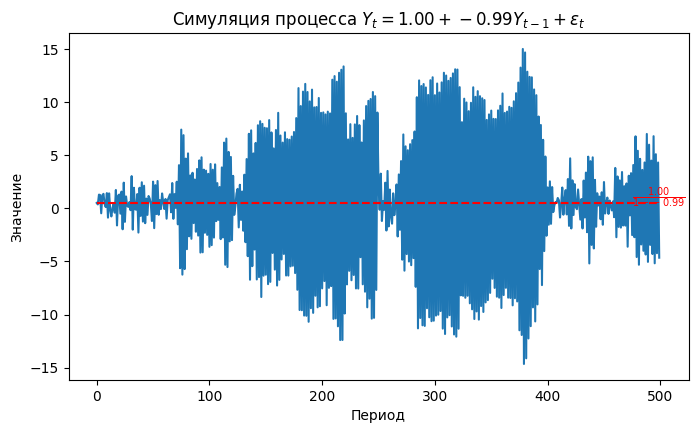

In [32]:
for phi_1 in [0.5, -0.5, -0.9, -0.99]:
    simulate_ar1_with_shock(phi_0 = 1, phi_1 = phi_1, T = 500, random_state = 42, plot = True)